# Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
data=pd.read_csv("C:/Users/kaism/Desktop/csv/titanic-passengers.csv",sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#replace missing values in Age feature by the mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [5]:
#delete Cabin colum
data.drop('Cabin',1,inplace=True)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [7]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
data['Embarked'].fillna('S',inplace=True)

In [9]:
data.isnull().sum().sum()

0

# Logistic Regression

In [10]:
data['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [11]:
#convert Survived variable into numerical
data['Survived']=data['Survived'].map({"Yes":"1","No":"0"})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [12]:
data['Survived']=data['Survived'].astype(int)
data['Sex']=data['Sex'].map({"male":"1","female":"0"})
data['Sex']=data['Sex'].astype(int)

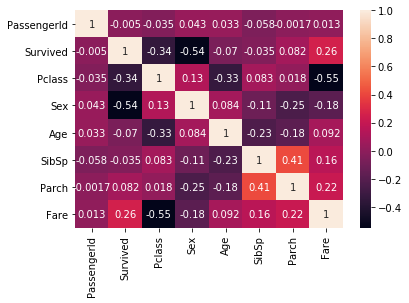

In [13]:
corr=data.corr()
sns.heatmap(corr,annot=True)

In [48]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x=data[["Fare","Sex"]]
y=data["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))

Accuracy=0.83


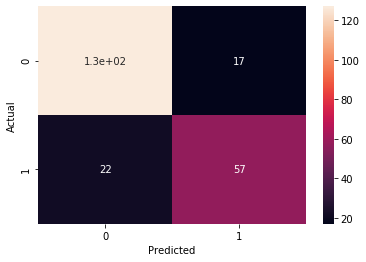

In [172]:
#Confusion Matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

In [173]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       144
           1       0.77      0.72      0.75        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



# Matrix ROC AUC

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [40]:
#Predict probabilities for the test data.
probs = logreg.predict_proba(x_test)

In [41]:
#Keep Probabilities of the positive class only.
probs = probs[:, 1]

In [42]:
#Compute the AUC Score.
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.82


In [43]:
#Defining a python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [44]:
#Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

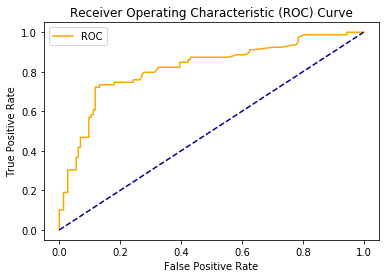

In [45]:
#Plot ROC Curve using our defined function
plot_roc_curve(fpr, tpr)